In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [72]:
orig_df = pd.read_csv("nor_ath2.csv")
orig_df.head()

,year,b,c,d,e,f,g,h,i,j,...,New_Construction,Working,household,ath_pop,th_worker,debt,percent_import_us,population,Planted_area,export
0,0.000000,0.000000,0.000000,0.012311,0.233831,0.008826,0.000000,0.116291,0.000000,0.000000,...,0.762059,0.536216,0.000000,0.76,0.010043,0.000000,0.925926,0.000000,0.374548,0.000000
1,0.043478,0.068808,0.094553,0.201231,0.298769,0.007468,0.000000,0.140911,0.072243,0.078185,...,0.742588,0.482776,0.043478,0.80,0.031288,0.041625,0.944444,0.066549,0.000000,0.000706
2,0.086957,0.086494,0.106252,0.129261,0.354281,0.027155,0.029703,0.105815,0.095691,0.178571,...,0.723118,0.234043,0.086957,0.84,0.096191,0.083249,0.574074,0.138467,0.051973,0.059739
3,0.130435,0.123784,0.218450,0.095644,0.326263,0.071283,0.019802,0.058146,0.088403,0.264479,...,0.703647,0.128884,0.130435,0.92,0.069879,0.399030,0.962963,0.212607,0.179269,0.125601
4,0.173913,0.071140,0.094937,0.032197,0.231212,0.040733,0.059406,0.052383,0.033587,0.334942,...,0.684176,0.000000,0.173913,0.96,0.114738,0.166498,0.592593,0.284231,0.538276,0.120552


In [73]:
dummy_df = orig_df.drop(['year'], axis=1)
dummy_df

,b,c,d,e,f,g,h,i,j,k,...,New_Construction,Working,household,ath_pop,th_worker,debt,percent_import_us,population,Planted_area,export
0,0.000000,0.000000,0.012311,0.233831,0.008826,0.000000,0.116291,0.000000,0.000000,0.000000,...,0.762059,0.536216,0.000000,0.76,0.010043,0.000000,0.925926,0.000000,0.374548,0.000000
1,0.068808,0.094553,0.201231,0.298769,0.007468,0.000000,0.140911,0.072243,0.078185,0.000000,...,0.742588,0.482776,0.043478,0.80,0.031288,0.041625,0.944444,0.066549,0.000000,0.000706
2,0.086494,0.106252,0.129261,0.354281,0.027155,0.029703,0.105815,0.095691,0.178571,0.054054,...,0.723118,0.234043,0.086957,0.84,0.096191,0.083249,0.574074,0.138467,0.051973,0.059739
3,0.123784,0.218450,0.095644,0.326263,0.071283,0.019802,0.058146,0.088403,0.264479,0.189189,...,0.703647,0.128884,0.130435,0.92,0.069879,0.399030,0.962963,0.212607,0.179269,0.125601
4,0.071140,0.094937,0.032197,0.231212,0.040733,0.059406,0.052383,0.033587,0.334942,0.432432,...,0.684176,0.000000,0.173913,0.96,0.114738,0.166498,0.592593,0.284231,0.538276,0.120552
5,0.053501,0.158611,0.000000,0.058916,0.008826,0.128713,0.009953,0.070659,0.242278,0.756757,...,0.664706,0.014505,0.217391,1.00,0.183456,0.390866,0.814815,0.349893,0.568654,0.203187
6,0.060714,0.199271,0.010417,0.000000,0.000000,0.108911,0.000000,0.067174,0.297297,0.702703,...,0.645235,0.229341,0.131293,0.92,0.448511,0.390055,1.000000,0.408776,0.517608,0.220590
7,0.106836,0.186805,0.008049,0.182770,0.012220,0.079208,0.029335,0.081749,0.277027,0.513514,...,0.625765,0.509911,0.304348,0.88,0.373350,0.481449,0.777778,0.461971,0.669850,0.226445
8,0.161253,0.214039,0.025568,0.297198,0.015614,0.079208,0.026716,0.112484,0.296332,0.567568,...,0.776471,0.349098,0.347826,0.80,0.247061,0.623539,0.685185,0.510236,0.581325,0.286381
9,0.228132,0.290564,0.168561,0.263682,0.036660,0.089109,0.126768,0.167617,0.357143,0.648649,...,0.494118,0.374051,0.238129,0.72,0.136082,0.700831,0.500000,0.554953,0.933783,0.368156


In [74]:
orig_df.shape

(24, 33)

In [75]:
orig_df.dtypes

year                 float64
b                    float64
c                    float64
d                    float64
e                    float64
f                    float64
g                    float64
h                    float64
i                    float64
j                    float64
k                    float64
l                    float64
m                    float64
n                    float64
o                    float64
p                    float64
q                    float64
r                    float64
s                    float64
t                    float64
u                    float64
Births               float64
Farm_holding         float64
New_Construction     float64
Working              float64
household            float64
ath_pop              float64
th_worker            float64
debt                 float64
percent_import_us    float64
population           float64
Planted_area         float64
export               float64
dtype: object

In [76]:
orig_df.columns

Index(['year', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'Births', 'Farm_holding',
       'New_Construction', 'Working', 'household', 'ath_pop', 'th_worker',
       'debt', 'percent_import_us', 'population', 'Planted_area', 'export'],
      dtype='object')

In [77]:
input_vars = [ 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'Births', 'Farm_holding',
       'New_Construction', 'Working', 'household', 'ath_pop', 'th_worker',
       'debt', 'percent_import_us', 'population', 'Planted_area', 'export']
len(input_vars)

31

In [78]:
df = orig_df.dropna()
X = df[input_vars]
y = df.b
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.02166061804424289, 0.9908375825273409]

In [38]:
df = dummy_df

# Filter

## low variance

In [39]:
# Compute variance of each feature
df.var()

b                    0.099173
c                    0.089125
d                    0.088804
e                    0.081707
f                    0.076198
g                    0.054479
h                    0.048308
i                    0.097017
j                    0.068414
k                    0.070620
l                    0.070829
m                    0.102398
n                    0.063088
o                    0.048645
p                    0.068744
q                    0.087431
r                    0.117929
s                    0.075660
t                    0.071892
u                    0.093427
Births               0.088116
Farm_holding         0.042843
New_Construction     0.055481
Working              0.097204
household            0.092559
ath_pop              0.120067
th_worker            0.129107
debt                 0.101485
percent_import_us    0.071317
population           0.091596
Planted_area         0.081497
export               0.113398
dtype: float64

In [40]:
min_var_threshold = 0.0915
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var()[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['i',
 'm',
 'r',
 'u',
 'Working',
 'household',
 'ath_pop',
 'th_worker',
 'debt',
 'population',
 'export']

In [41]:
len(updated_vars)

11

In [42]:
df2 = df[updated_vars]
df2['b']=df.b
df2.head()

<ipython-input-42-9588ce268da4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['b']=df.b


,i,m,r,u,Working,household,ath_pop,th_worker,debt,population,export,b
0,0.000000,0.306989,0.000000,0.000000,0.536216,0.000000,0.76,0.010043,0.000000,0.000000,0.000000,0.000000
1,0.072243,0.137818,0.039102,0.041284,0.482776,0.043478,0.80,0.031288,0.041625,0.066549,0.000706,0.068808
2,0.095691,0.120183,0.065170,0.091743,0.234043,0.086957,0.84,0.096191,0.083249,0.138467,0.059739,0.086494
3,0.088403,0.131940,0.197683,0.087156,0.128884,0.130435,0.92,0.069879,0.399030,0.212607,0.125601,0.123784
4,0.033587,0.015676,0.197683,0.110092,0.000000,0.173913,0.96,0.114738,0.166498,0.284231,0.120552,0.071140


In [43]:
df2 = df2.dropna()
X = df2[updated_vars]
y = df2['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.06572536578525731, 0.9156404195771574]

In [44]:
x1 = df['i'].to_numpy()
x2 =df['m'].to_numpy()
x3 = df['r'].to_numpy()
x4 =df['u'].to_numpy()
x5 = df['Working'].to_numpy()
x6 = df['household'].to_numpy()
x7 =df['ath_pop'].to_numpy()
x8 = df['th_worker'].to_numpy()
x9 =df['debt'].to_numpy()
x10 = df['population'].to_numpy()
x11 =df['export'].to_numpy()

y = df['b'].to_numpy()


In [45]:
def test(X, a, b, c, d, e, f, g, h, i, j, k, l):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7 +i*x8 +j*x9 +k*x10 +l*x11


In [46]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11), ydata, maxfev=20000) 
param



array([ 1.66383949e-01,  5.26558073e-01, -1.55744414e-01, -6.43998000e-02,
        1.65161321e-01, -1.77892910e-04,  3.39939256e-01, -1.32620092e-01,
       -1.07679401e-01,  1.34224107e-01, -5.76923024e-01,  5.92652826e-01])

In [47]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7+ param[8]*x8+ param[9]*x9+ param[10]*x10 + param[11]*x11)
predictions


array([0.01660406, 0.06010065, 0.08346163, 0.11417015, 0.03634386,
       0.10785705, 0.035853  , 0.11315054, 0.18761346, 0.21307161,
       0.25860872, 0.31766981, 0.38018846, 0.48492505, 0.464721  ,
       0.43226237, 0.51510015, 0.77856056, 0.78077838, 0.72947571,
       0.67334632, 0.78227752, 0.92659401, 1.00270014])

In [48]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)


0.9941315798496599

In [49]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse



0.023616559172637802

## High Correlation Filtering

<AxesSubplot:>

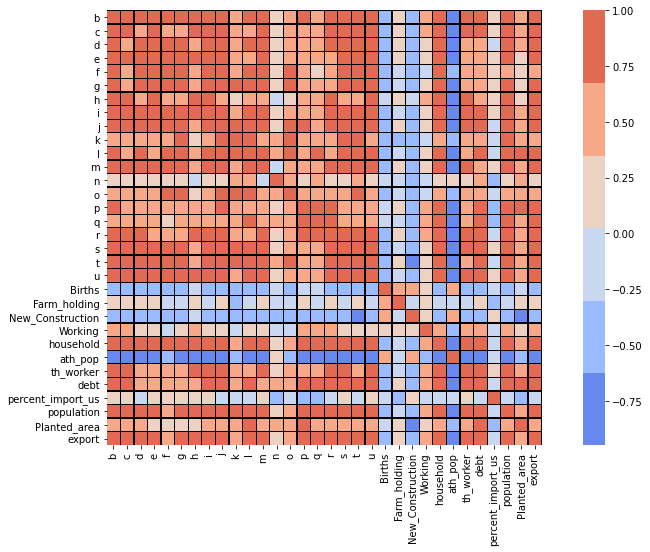

In [50]:
df = dummy_df.copy()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=False)

In [51]:
df = df.dropna()
X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.02166061804424289, 0.9908375825273409]

In [52]:
df.shape

(24, 32)

In [53]:
#df.drop(['Births','population','s','t','u','j','i','m','g','h','c','d','e'], 1, inplace=True)
#df.drop(['Births','population','s','t','u','j','i','g','h','d','e'], 1, inplace=True)
df.drop(['i', 'population', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'Births', 'Farm_holding',
       'New_Construction','percent_import_us', 'Planted_area'], 1, inplace=True)
df.shape

(24, 11)

In [54]:
updated_vars = list(input_vars)
#updated_vars.remove('c')
#updated_vars.remove('d')
updated_vars.remove('population')
updated_vars.remove('i')
updated_vars.remove('e')
updated_vars.remove('f')
updated_vars.remove('g')
updated_vars.remove('h')
updated_vars.remove('j')
updated_vars.remove('k')
updated_vars.remove('l')
updated_vars.remove('n')
updated_vars.remove('o')
updated_vars.remove('p')
updated_vars.remove('q')
updated_vars.remove('r')
updated_vars.remove('s')
updated_vars.remove('t')
updated_vars.remove('Births')
updated_vars.remove('Farm_holding')
updated_vars.remove('New_Construction')
updated_vars.remove('percent_import_us')
updated_vars.remove('Planted_area')
len(updated_vars )

10

In [55]:
# updated_vars = list(input_vars)
# updated_vars.remove('Births')
# updated_vars.remove('population')
# updated_vars.remove('s')
# updated_vars.remove('t')
# updated_vars.remove('u')
# updated_vars.remove('j')
# updated_vars.remove('i')
# #updated_vars.remove('m')
# updated_vars.remove('g')
# updated_vars.remove('h')
# #updated_vars.remove('c')
# updated_vars.remove('d')
# updated_vars.remove('e')
# len(updated_vars )

In [56]:
df = df.dropna()
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04129277608648301, 0.9667021226076892]

In [57]:
updated_vars

['c',
 'd',
 'm',
 'u',
 'Working',
 'household',
 'ath_pop',
 'th_worker',
 'debt',
 'export']

In [64]:
x1 = df['c'].to_numpy()
x2 =df['m'].to_numpy()
x3 = df['u'].to_numpy()
x4 =df['Working'].to_numpy()
x5 = df['household'].to_numpy()
x6 = df['ath_pop'].to_numpy()
x7 =df['th_worker'].to_numpy()
x8 = df['debt'].to_numpy()
x9 =df['d'].to_numpy()
x10 = df['export'].to_numpy()

y = df['b'].to_numpy()


In [65]:
def test(X, a, b, c, d, e, f, g, h, i, j, k):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7 +i*x8 +j*x9 +k*x10


In [66]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7, x8, x9, x10), ydata, maxfev=20000) 
param



array([-0.26589943,  0.503507  ,  0.203903  ,  0.16429378,  0.06640812,
        0.21520644,  0.22149828, -0.14200549, -0.12502509,  0.25793326,
        0.25282335])

In [67]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7+ param[8]*x8+ param[9]*x9+ param[10]*x10)
predictions


array([0.00239346, 0.07764407, 0.07186877, 0.12233452, 0.05492434,
       0.0852824 , 0.0586006 , 0.12677383, 0.14160004, 0.20443555,
       0.28552959, 0.31644275, 0.34446044, 0.5211274 , 0.4620267 ,
       0.43183756, 0.50596814, 0.81153927, 0.76776496, 0.67493363,
       0.71919716, 0.80658257, 0.90107947, 1.00108821])

In [68]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)


0.9971038490660197

In [69]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse



0.016590772917483308

# Wrapper Methods

## Forward Feature Selection

In [521]:
df = dummy_df.copy()
df = df.dropna()

In [522]:
from sklearn.feature_selection import f_regression
fstat, pval = f_regression(df[input_vars], df.b)
fstat

array([8.74297019e+01, 8.91484914e+01, 9.97265910e+01, 2.60344699e+01,
       6.11285345e+01, 3.51144450e+01, 3.23780734e+02, 8.92403944e+01,
       1.20835934e+01, 3.23019795e+01, 1.48768424e+02, 4.44365801e-01,
       1.12368978e+01, 2.23560667e+01, 1.37581909e+01, 7.77457446e+01,
       2.31349597e+02, 7.99189511e+01, 1.67044134e+02, 5.82516449e+00,
       1.08750520e-01, 9.08228287e+00, 3.77164294e+00, 1.49868564e+02,
       1.70274982e+02, 6.50314496e+01, 3.80793647e+01, 1.16825290e-01,
       1.06271122e+02, 5.35111242e+00, 2.54886690e+02])

In [523]:
pval

array([4.03874036e-09, 3.39652329e-09, 1.23759977e-09, 4.11286267e-05,
       8.62268953e-08, 5.79615258e-06, 1.19864115e-14, 3.36547450e-09,
       2.14323679e-03, 1.02483499e-05, 2.90583109e-11, 5.11953735e-01,
       2.88192120e-03, 1.01943316e-04, 1.22254775e-03, 1.13168510e-08,
       3.71144055e-13, 8.90400581e-09, 9.43542038e-12, 2.45695383e-02,
       7.44690544e-01, 6.38866282e-03, 6.50402836e-02, 2.70648972e-11,
       7.82294114e-12, 5.16828211e-08, 3.27755496e-06, 7.35746963e-01,
       6.92163110e-10, 3.04429622e-02, 1.39171403e-13])

In [524]:
f_value_threshold = 90  # can adjust this value 
updated_vars = []
for i in range(0,len(input_vars)-1):
    if fstat[i] >= f_value_threshold:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['e', 'i', 'm', 's', 'u', 'household', 'ath_pop', 'population']

In [525]:
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.052106591332225054, 0.94697829183725]

In [526]:
len(updated_vars)

8

In [527]:
x1 = df['e'].to_numpy()
x2 =df['i'].to_numpy()
x3 = df['m'].to_numpy()
x4 =df['s'].to_numpy()
x5 = df['u'].to_numpy()
x6 = df['household'].to_numpy()
x7 =df['ath_pop'].to_numpy()
x8 = df['population'].to_numpy()

y = df['b'].to_numpy()


In [528]:
def test(X, a, b, c, d, e, f, g, h, i):
    x1, x2, x3, x4, x5, x6, x7, x8 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7 +i*x8



In [529]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7, x8), ydata, maxfev=20000) 
param


array([ 0.08477133,  0.27372663,  0.42054662, -0.04645186,  0.01102427,
       -0.08756545,  0.12459025, -0.17440381,  0.21712915])

In [530]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7+ param[8]*x8)
predictions


array([0.00196996, 0.06897264, 0.10456548, 0.10166031, 0.07049933,
       0.04848544, 0.04498634, 0.12795633, 0.20298089, 0.22964727,
       0.23372924, 0.30940572, 0.38993351, 0.46821291, 0.45342798,
       0.41300384, 0.53782593, 0.78807185, 0.77460557, 0.71702704,
       0.71244852, 0.77997018, 0.89417763, 1.02187153])

In [531]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)

0.9955554137110821

In [532]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse



0.0205528330445385

## Recursive Feature Elimination

In [533]:
df = dummy_df.copy()
df = df.dropna()

In [534]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['b']
n_features = 7  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features)
model = rfe.fit(X, y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [535]:
model.ranking_

array([ 1,  2,  1,  1, 20,  3,  1, 13, 21,  9,  1,  7, 24, 22,  1,  4,  1,
        5,  8, 23, 16, 10, 18, 11,  6, 25, 15, 14, 19, 17, 12])

In [536]:
model.estimator_.coef_

array([0.29990363, 0.19639755, 0.10186789, 0.10292747, 0.20132769,
       0.14498993, 0.17220969])

In [537]:
updated_vars = []
for i in range(0,len(input_vars)-1):
    if model.ranking_[i] == 1:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['c', 'e', 'f', 'i', 'm', 'q', 's']

In [538]:
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.017416488188985193, 0.9940763475937416]

In [539]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
n_features = 10  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features)
model = rfe.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0.71834086, 0.67543725, 0.10037275, 0.3711778 , 0.47128061,
       0.10308549, 0.38756452, 0.59800426])

In [540]:
len(updated_vars)

7

In [541]:
x1 = df['c'].to_numpy()
x2 =df['e'].to_numpy()
x3 = df['f'].to_numpy()
x4 =df['i'].to_numpy()
x5 = df['m'].to_numpy()
x6 = df['q'].to_numpy()
x7 =df['s'].to_numpy()

y = df['b'].to_numpy()


In [542]:
def test(X, a, b, c, d, e, f, g, h):
    x1, x2, x3, x4, x5, x6, x7 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7



In [543]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7), ydata, maxfev=20000) 
param


array([-0.10104487,  0.29990362,  0.19639755,  0.10186789,  0.10292748,
        0.20132768,  0.14498993,  0.17220969])

In [544]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7)
predictions


array([0.00758333, 0.0544195 , 0.08056832, 0.13380544, 0.06135073,
       0.05582313, 0.0666462 , 0.11179427, 0.17707262, 0.21833048,
       0.27475961, 0.32666235, 0.35444885, 0.49495504, 0.46213612,
       0.39349395, 0.52802375, 0.80581198, 0.78159899, 0.69525385,
       0.70535886, 0.78724443, 0.91409984, 1.00419379])

In [545]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)

0.9988477989164837

In [546]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse


0.010464540495133845

# Embedded Methods

## Regression & Lasso (L1)

In [547]:
df = dummy_df.copy()
df = df.dropna()
X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [548]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.02166061804424289, 0.9908375825273409]

In [549]:
from sklearn.linear_model import Lasso

## Perform regresssion with embedded lasso 
## set alpha (weight of penalty term) = 1

lasso = Lasso(alpha=0.01)
model = lasso.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.061140214165068534, 0.9270000943554823]

In [550]:
[model.coef_, model.intercept_]

[array([ 0.        ,  0.00133356,  0.        ,  0.        ,  0.        ,
         0.        ,  0.46998221,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        , -0.16903092,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.29480359]),
 0.184223952652123]

In [551]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-0.1690309202525604,
 0.0013335636562803327,
 0.2948035870312237,
 0.4699822141032067]

In [552]:
update_vars

['ath_pop', 'd', 'export', 'i']

In [553]:
len(update_vars)

4

In [555]:
x1 = df['ath_pop'].to_numpy()
x2 =df['d'].to_numpy()
x3 = df['export'].to_numpy()
x4 =df['i'].to_numpy()

y = df['b'].to_numpy()

In [556]:
def test(X, a, b, c, d, e):
    x1, x2, x3, x4 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 


In [557]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4), ydata, maxfev=20000) 
param


array([ 0.13114593, -0.14493297,  0.14200095,  0.27038088,  0.4586512 ])

In [558]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4)
predictions


array([0.022745  , 0.07709985, 0.08779851, 0.08589551, 0.04458189,
       0.07355861, 0.08973944, 0.10346859, 0.1478531 , 0.22715022,
       0.26179874, 0.32916135, 0.39163156, 0.47998606, 0.44162639,
       0.4536455 , 0.48553075, 0.73924984, 0.73663686, 0.79570091,
       0.73010775, 0.79717782, 0.89111224, 1.00217896])

In [559]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)


0.9867792010975083

In [560]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse


0.035447439746278654

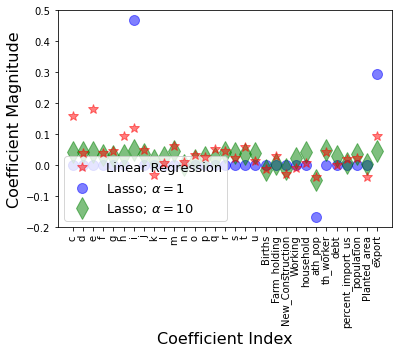

In [554]:
plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Lasso; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Lasso; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Regression & Ridge (L2)

In [472]:
from sklearn.linear_model import Ridge

## Perform regresssion with ridge 
## set alpha (weight of penalty term) = 1

X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

ridge = Ridge(alpha=0.05)
model = ridge.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.02998324725230018, 0.9824439940368592]

In [473]:
[model.coef_, model.intercept_]

[array([ 0.13427066,  0.05197508,  0.15065646,  0.0347754 ,  0.04581257,
         0.08945845,  0.11141082,  0.04192132, -0.01530852,  0.01078607,
         0.05633203,  0.01105909,  0.02482136,  0.02660978,  0.04537567,
         0.04999562,  0.0370832 ,  0.06287812,  0.02653311, -0.00539755,
         0.0354082 , -0.02486078,  0.00505485,  0.01869294, -0.04983776,
         0.04745772,  0.0015515 ,  0.02470103,  0.02840659, -0.04441344,
         0.08294106]),
 -0.035498822160487664]

In [474]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-0.049837763168202154,
 -0.04441344252164716,
 -0.024860780464394154,
 -0.015308518879376225,
 -0.005397548600641122,
 0.0015515010967930287,
 0.0050548513472947615,
 0.0107860674413249,
 0.0110590943891699,
 0.018692944723739092,
 0.024701029197369807,
 0.024821360303410082,
 0.026533107196624398,
 0.02660977742726285,
 0.028406589479265165,
 0.034775403070734234,
 0.03540820086475715,
 0.03708320275465448,
 0.04192131906552654,
 0.04537566850067315,
 0.045812571761709595,
 0.04745771898330212,
 0.04999562308477448,
 0.05197508383337699,
 0.056332030989466694,
 0.06287811868979876,
 0.08294105873689908,
 0.0894584494282995,
 0.11141082428132197,
 0.13427066155118672,
 0.150656464064637]

In [475]:
update_vars

['ath_pop',
 'Planted_area',
 'New_Construction',
 'k',
 'Births',
 'debt',
 'Working',
 'l',
 'n',
 'household',
 'percent_import_us',
 'o',
 'u',
 'p',
 'population',
 'f',
 'Farm_holding',
 's',
 'j',
 'q',
 'g',
 'th_worker',
 'r',
 'd',
 'm',
 't',
 'export',
 'h',
 'i',
 'c',
 'e']

In [476]:
len(update_vars)

31

In [477]:
ridge = Ridge(alpha=10)
model2 = ridge.fit(X_train, y_train)
y_pred = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.07226121256489881, 0.8980284837036712]

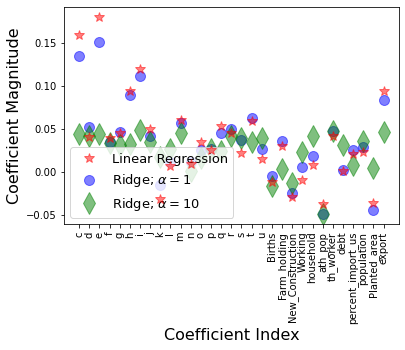

In [478]:
plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Ridge; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Ridge; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Random Forest

In [479]:
df = dummy_df.copy()
df = df.dropna()

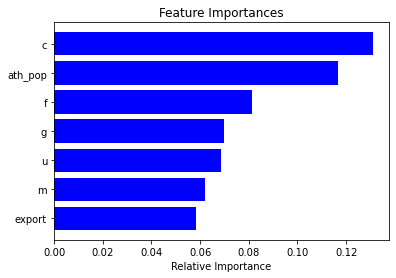

In [480]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df.b)

n_features = 7

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Choose features with large feature importance

In [481]:
important_features = [features[i] for i in indices]
important_features
updated_vars = []
for i in range(-1,-n_features-1,-1):
    updated_vars.append(important_features[i])
updated_vars

['c', 'ath_pop', 'f', 'g', 'u', 'm', 'export']

In [482]:
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.048897683785351524, 0.9533077327254058]